# Explore the behavior of Tc

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

In C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotli

Populating the interactive namespace from numpy and matplotlib


In [4]:
data_path = Path("../../data/regular/infinite-size").resolve()
file = 'regular_all_inv_Tc.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

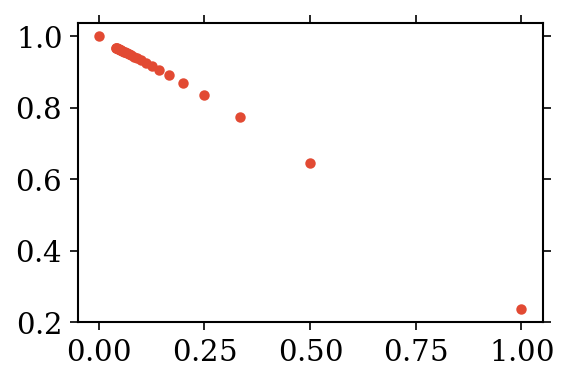

In [15]:
COLUMN="P1.0"
# Get the data in arrays
df_part = df_all_tc[["1/nv",COLUMN]]
df_part = df_part.dropna()
x_data = df_part['1/nv'].values
y_data = df_part[COLUMN].values
# add value at nv=1
x_data = np.concatenate([x_data,[1]])
y_data = np.concatenate([y_data,[1.19968]])
if COLUMN == 'P1.0':
    x_data = np.insert(x_data,0,0)
    y_data = np.insert(y_data,0,0)
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x_data, 1/np.exp(y_data**2), marker="o", lw=0)


In [5]:
data_path = Path("../../data/regular/infinite-size").resolve()
file = 'regular_all_Tc.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

In [11]:
df_all_tc

,nv,P0.5,P1.0,P1.05,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0,P2.5,P4,P5,Incert
0,2,1.650080,1.508930,1.488934,1.469946,1.428265,1.394645,1.360791,1.330271,1.298417,1.271128,1.244646,1.218500,1.196846,1.095501,0.945082,0.82504,NaN
1,3,2.522788,1.978686,1.935196,1.892921,1.830096,1.740525,1.674612,1.613994,1.555711,1.503083,1.455246,1.409521,1.364751,1.214908,0.945082,0.82504,NaN
2,4,3.240916,2.349033,2.282810,2.218437,2.114914,1.994955,1.892921,1.800771,1.723341,1.649272,1.583917,1.522574,1.469201,1.248587,0.945082,0.82504,NaN
3,5,3.989909,2.660904,2.570319,2.485476,2.325746,2.189679,2.060552,1.950210,1.846141,1.754529,1.669945,1.596644,1.530485,1.275186,0.945082,0.82504,NaN
4,6,4.559498,2.931842,2.819434,2.713532,2.520381,2.354489,2.196996,2.055190,1.939702,1.832496,1.739543,1.651221,1.576001,1.293508,0.945082,0.82504,NaN
5,7,5.159640,3.173542,3.039551,2.914299,2.685063,2.489525,2.310049,2.159736,2.017670,1.894871,1.785192,1.692154,1.605684,1.305456,0.945082,0.82504,NaN
6,8,NaN,3.389839,3.236777,3.092574,2.832438,2.605276,2.407426,2.232780,2.081339,1.946996,1.828530,1.725940,1.634343,NaN,NaN,NaN,NaN
7,9,NaN,3.589155,3.415327,3.253786,2.963117,2.711529,2.491695,2.301172,2.135076,1.989741,1.862726,1.751588,1.653884,NaN,NaN,NaN,NaN
8,10,NaN,3.772838,3.580036,3.401563,3.081583,2.805569,2.567416,2.361016,2.182706,2.026380,1.892037,1.773571,1.670982,NaN,NaN,NaN,NaN
9,11,NaN,3.942843,3.731760,3.537128,3.190278,2.892281,2.635808,2.414753,2.224231,2.059355,1.916463,1.791891,1.684416,NaN,NaN,NaN,NaN


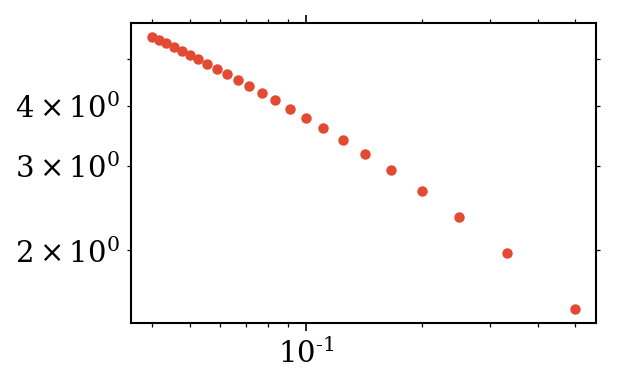

In [14]:
COLUMN="P1.0"
# Get the data in arrays
df_part = df_all_tc[["nv",COLUMN]]
df_part = df_part.dropna()
x_data = df_part['nv'].values
y_data = df_part[COLUMN].values
# add value at nv=1
# x_data = np.concatenate([x_data,[1]])
# y_data = np.concatenate([y_data,[1.19968]])
# if COLUMN == 'P1.0':
#     x_data = np.insert(x_data,0,0)
#     y_data = np.insert(y_data,0,0)
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(1/x_data, y_data, marker="o", lw=0)

ax.set_yscale('log')
ax.set_xscale('log')